In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
data=pd.read_csv("CC GENERAL.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
data.drop("CUST_ID",axis=1,inplace=True)

In [4]:
data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
data["CREDIT_LIMIT"].fillna(data["CREDIT_LIMIT"].mean(),inplace=True)

In [6]:
data["MINIMUM_PAYMENTS"].fillna(data["MINIMUM_PAYMENTS"].mean(),inplace=True)

In [7]:
data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [8]:
data.shape

(8950, 17)

In [9]:
data.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019FDD3E0EF0>,
      dtype=object)

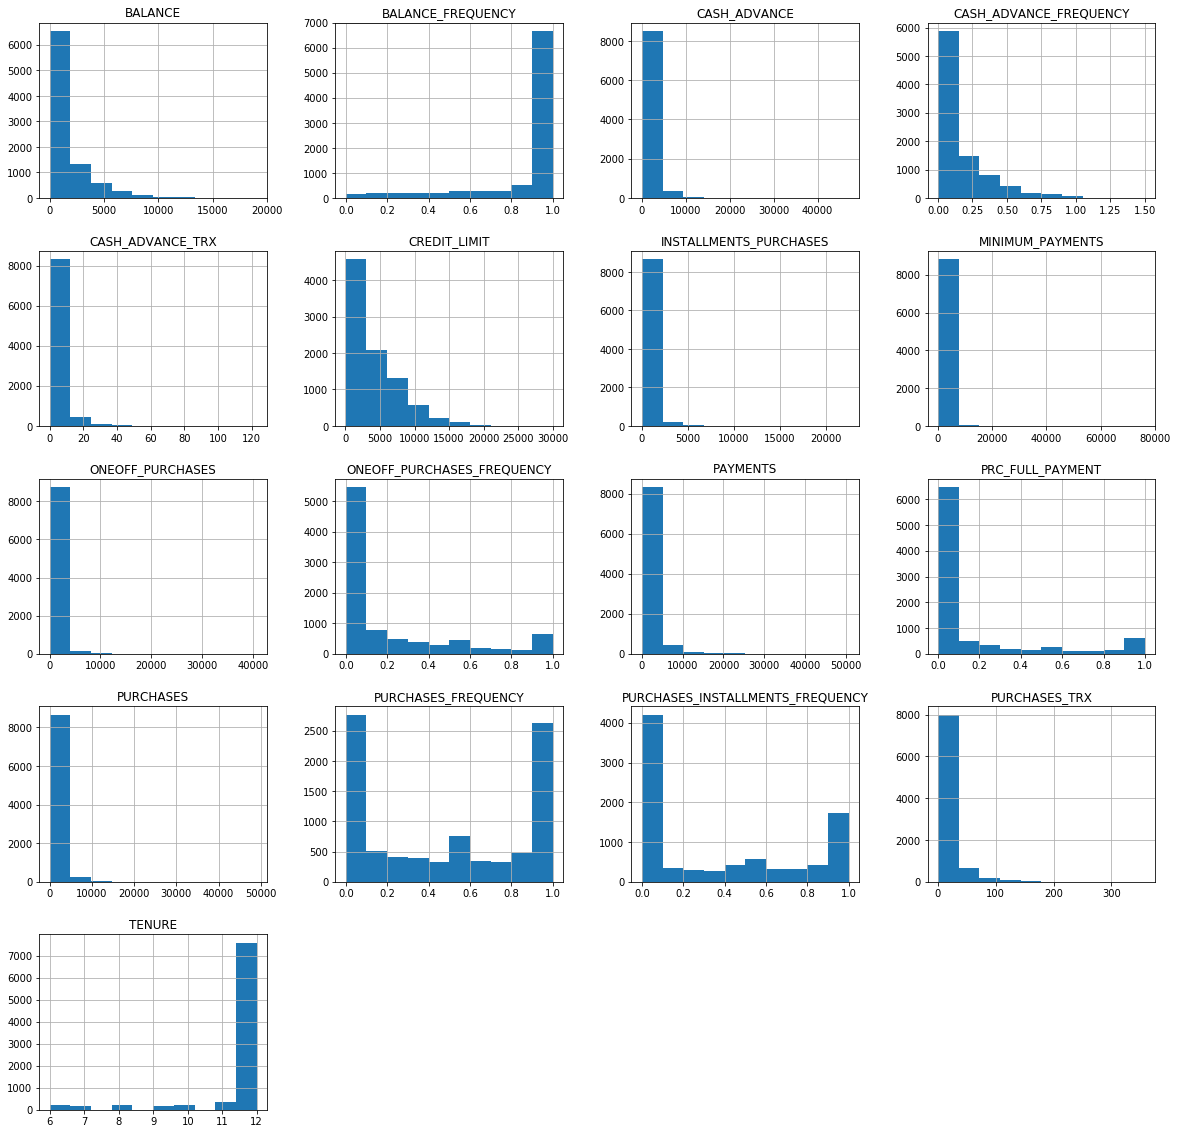

In [10]:
data.hist(figsize=(20,20))

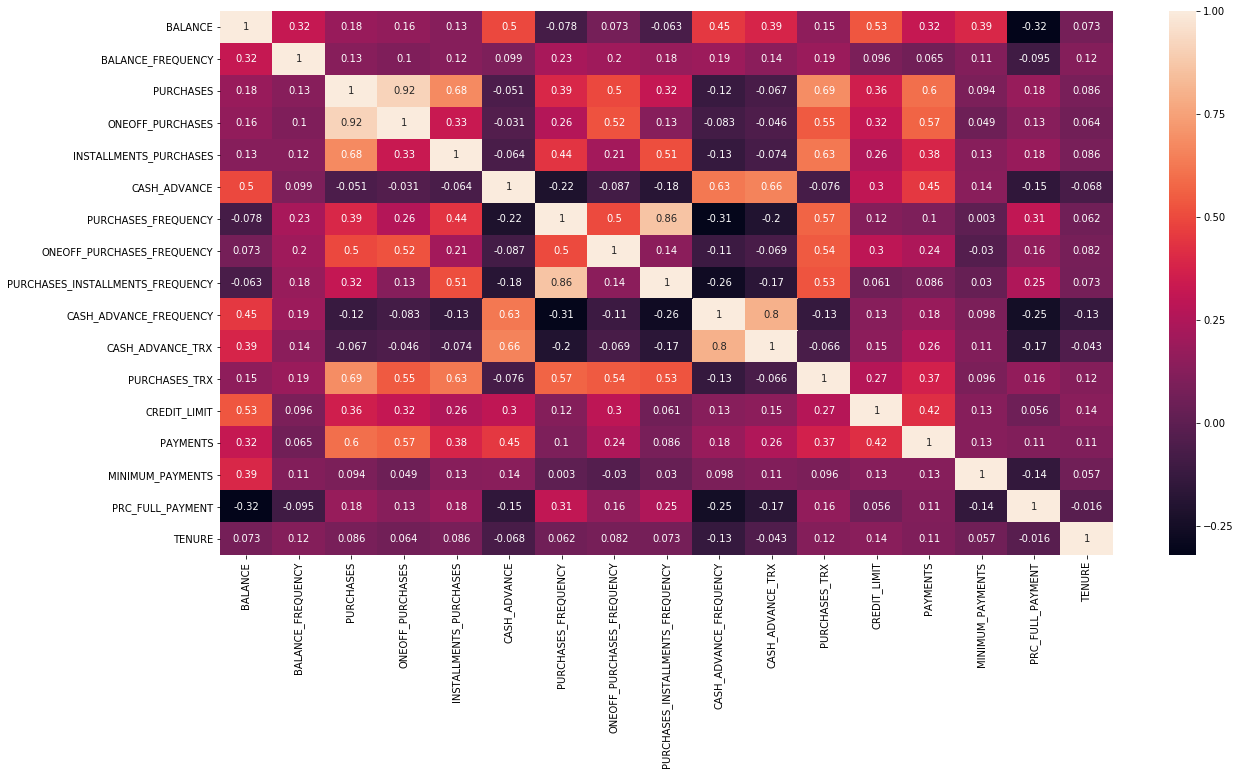

In [11]:
plt.figure(figsize=(20,10))
sn.heatmap(data.corr(),annot=True)

In [12]:
#sn.pairplot(data)

In [13]:
x=data.iloc[:,:].values
x

array([[4.09007490e+01, 8.18182000e-01, 9.54000000e+01, ...,
        1.39509787e+02, 0.00000000e+00, 1.20000000e+01],
       [3.20246742e+03, 9.09091000e-01, 0.00000000e+00, ...,
        1.07234022e+03, 2.22222000e-01, 1.20000000e+01],
       [2.49514886e+03, 1.00000000e+00, 7.73170000e+02, ...,
        6.27284787e+02, 0.00000000e+00, 1.20000000e+01],
       ...,
       [2.33986730e+01, 8.33333000e-01, 1.44400000e+02, ...,
        8.24183690e+01, 2.50000000e-01, 6.00000000e+00],
       [1.34575640e+01, 8.33333000e-01, 0.00000000e+00, ...,
        5.57556280e+01, 2.50000000e-01, 6.00000000e+00],
       [3.72708075e+02, 6.66667000e-01, 1.09325000e+03, ...,
        8.82889560e+01, 0.00000000e+00, 6.00000000e+00]])

In [14]:
from sklearn.cluster import KMeans 

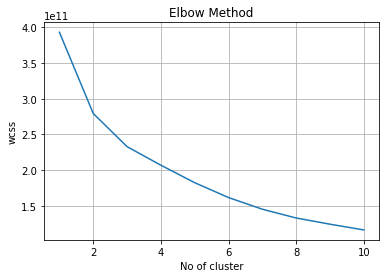

In [15]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++',random_state=1)
    km.fit(x)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.xlabel("No of cluster")
plt.ylabel("wcss")
plt.title("Elbow Method")
plt.grid()
plt.show()

In [47]:
km=KMeans(n_clusters=3,init='k-means++',random_state=1)
y_means=km.fit_predict(x)

In [48]:
y_means

array([0, 1, 1, ..., 0, 0, 0])

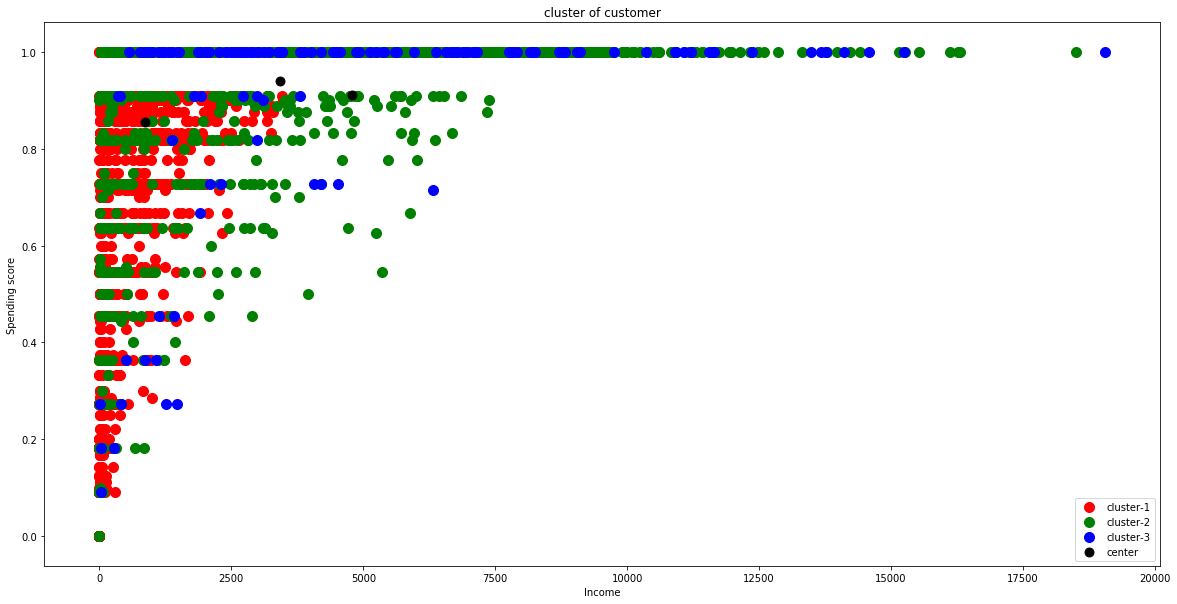

In [49]:
plt.figure(figsize=(20,10))
plt.scatter(x[y_means==0,0],x[y_means==0,1],s=100,c='red',label="cluster-1")
plt.scatter(x[y_means==1,0],x[y_means==1,1],s=100,c='green',label="cluster-2")
plt.scatter(x[y_means==2,0],x[y_means==2,1],s=100,c='blue',label="cluster-3")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=80,c='black',label='center')
plt.xlabel("Income")
plt.ylabel("Spending score")
plt.title("cluster of customer")
plt.legend()
plt.show()

In [50]:
data['Cluster']=y_means
data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,0
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,1
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12,0
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12,0
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12,1


In [54]:
import seaborn as sns
from sklearn.decomposition import PCA

In [55]:
labels=km.labels_

In [56]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head(2)

,principal component 1,principal component 2
0,-4326.383956,921.566884
1,4118.916676,-2432.846347


In [61]:
finalDf = pd.concat([principalDf, pd.DataFrame({'cluster':labels})], axis = 1)
finalDf.head()

,principal component 1,principal component 2,cluster
0,-4326.383956,921.566884,0
1,4118.916676,-2432.846347,1
2,1497.907660,-1997.578692,1
3,1394.548556,-1488.743450,1
4,-3743.351874,757.342659,0


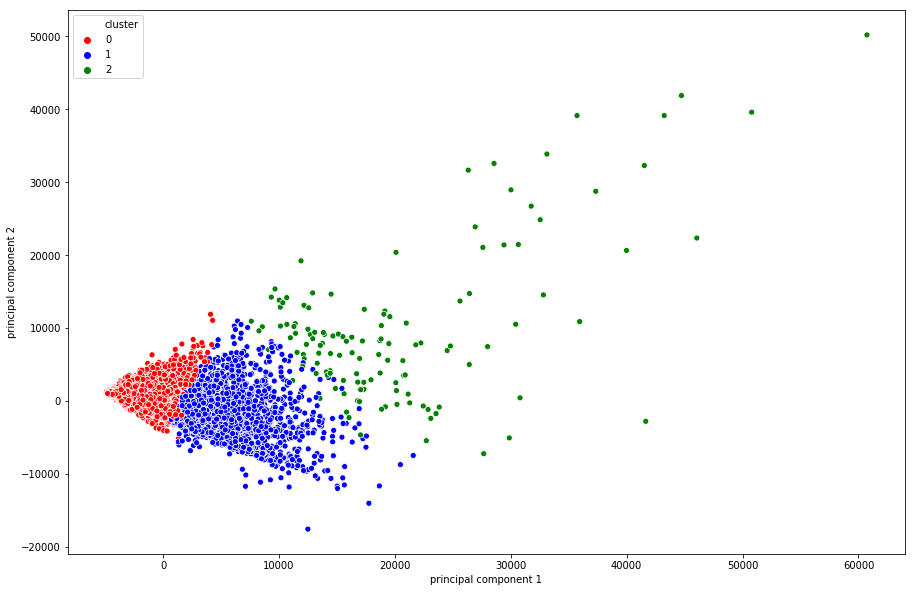

In [63]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x="principal component 1", y="principal component 2", hue="cluster",
data=finalDf,palette=['red','blue','green'])
plt.show()